# Demographics (gender, age, employment status, building type they live in) of G@C participation

## Gender

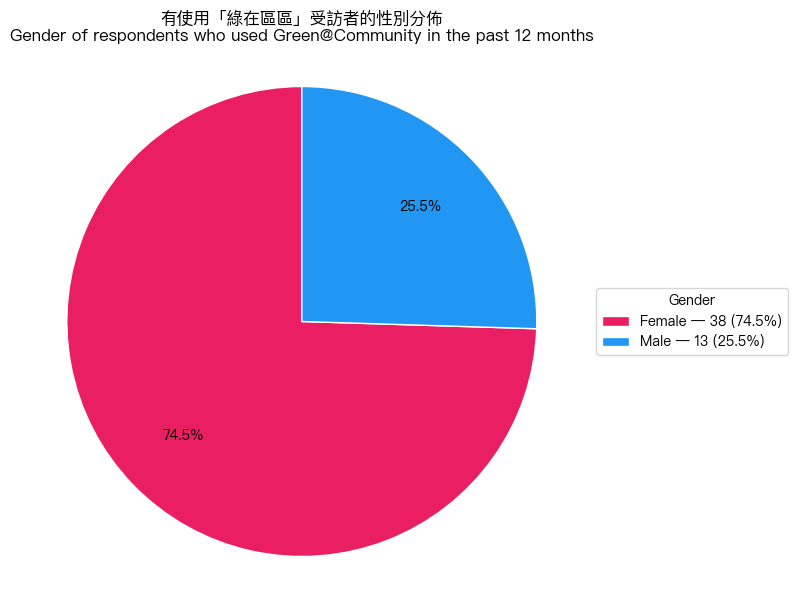

In [8]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")
_ensure("numpy")

# ---------- imports ----------
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from textwrap import wrap

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- helper to find columns by header pattern ----------
def find_col(columns, patterns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    return None

# ---------- locate the 12-month usage (Yes/No) column ----------
use_patterns = [
    r"in\s+the\s+past\s+12\s+months.*used\s+any\s+green@community\s+recycling\s+facility",
    r"在最近12個月.*有否使用過.*綠在區區.*回收設施",
]
use_col = find_col(df.columns, use_patterns)
if use_col is None:
    raise RuntimeError("Could not find the 'past 12 months use' Yes/No column.")

# ---------- locate the Gender column ----------
gender_patterns = [
    r"\bgender\b",
    r"性別",
    r"性别",
]
gender_col = find_col(df.columns, gender_patterns)
if gender_col is None:
    raise RuntimeError("Could not find the Gender column.")

use_series    = df[use_col].astype(str)
gender_series = df[gender_col].astype(str)

# ---------- map Yes/No usage ----------
def used_facility(text):
    s = str(text).strip().lower()
    if s in {"yes", "y", "是", "有"}:
        return True
    if s in {"no", "n", "否", "沒有", "未有", "無"}:
        return False
    return None

use_flags = use_series.map(used_facility)

# filter only respondents who answered "Yes"
mask_yes = (use_flags == True)
gender_yes = gender_series[mask_yes].str.strip()
gender_yes = gender_yes[gender_yes != ""]  # drop empty

# ---------- count genders ----------
counts_raw = gender_yes.value_counts()

labels = list(counts_raw.index)
counts = [int(counts_raw[l]) for l in labels]
total  = sum(counts)

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK",
                  "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# ---------- colour mapping: Female = pink, Male = blue ----------
def gender_color(label: str) -> str:
    s = label.strip().lower()
    # include common English / Chinese patterns
    if "female" in s or "女" in s:
        return "#E91E63"  # pink
    if "male" in s or "男" in s:
        return "#2196F3"  # blue
    # neutral grey for others
    return "#9E9E9E"

colors = [gender_color(l) for l in labels]

# ---------- legend labels ----------
pct = [(c / total * 100) if total > 0 else 0.0 for c in counts]
legend_labels = [
    f"{labels[i]} — {counts[i]} ({pct[i]:.1f}%)"
    for i in range(len(labels))
]

# ---------- plot pie chart (white background, legend on right) ----------
fig, ax = plt.subplots(figsize=(8, 6), facecolor="white")
ax.set_facecolor("white")

wedges, text_labels, autotexts = ax.pie(
    counts,
    labels=None,          # use legend instead
    colors=colors,
    startangle=90,
    autopct=(lambda p: f"{p:.1f}%") if total > 0 else None,
    pctdistance=0.70,
    wedgeprops=dict(edgecolor="white"),
)

ax.legend(
    wedges,
    legend_labels,
    title="Gender",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

title_main = "有使用「綠在區區」受訪者的性別分佈\nGender of respondents who used Green@Community in the past 12 months"

ax.set_title(title_main , pad=16)
ax.axis("equal")  # keep pie circular

plt.tight_layout()
plt.show()


## Age

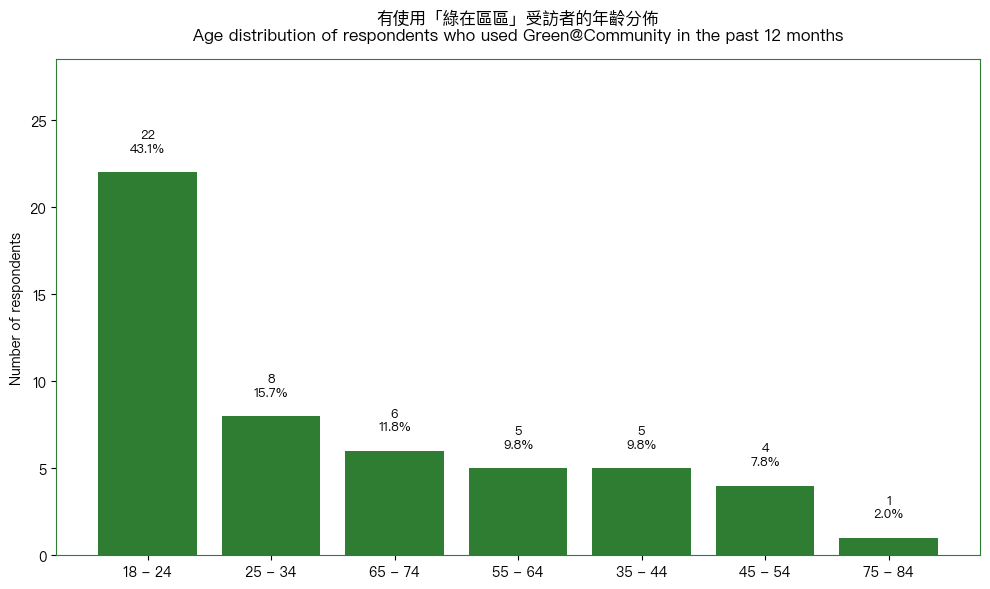

In [12]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from textwrap import wrap

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- helper to find columns by header pattern ----------
def find_col(columns, patterns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    return None

# column: 12-month use of G@C (Yes/No)
use_patterns = [
    r"in\s+the\s+past\s+12\s+months.*used\s+any\s+green@community\s+recycling\s+facility",
    r"在最近12個月.*有否使用過.*綠在區區.*回收設施",
]
use_col = find_col(df.columns, use_patterns)
if use_col is None:
    raise RuntimeError("Could not find the 'past 12 months use' Yes/No column.")

# column: Age
age_patterns = [
    r"\bage\b",
    r"年齡",
]
age_col = find_col(df.columns, age_patterns)
if age_col is None:
    raise RuntimeError("Could not find the Age column.")

use_series = df[use_col].astype(str)
age_series = df[age_col].astype(str)

# ---------- map Yes/No usage ----------
def used_facility(text):
    s = str(text).strip().lower()
    if s in {"yes", "y", "是", "有"}:
        return True
    if s in {"no", "n", "否", "沒有", "未有", "無"}:
        return False
    return None

use_flags = use_series.map(used_facility)

# filter only respondents who answered "Yes"
mask_yes = (use_flags == True)
ages_yes = age_series[mask_yes].dropna().str.strip()
ages_yes = ages_yes[ages_yes != ""]

# ---------- count age groups ----------
age_order_pref = [
    "17 or below",
    "18 - 24",
    "25 - 34",
    "35 - 44",
    "45 - 54",
    "55 - 64",
    "65 - 74",
    "75 - 84",
    "85 or above",
]

counts_raw = ages_yes.value_counts()

# NEW: sort by value (DESC) instead of questionnaire order
counts_sorted = counts_raw.sort_values(ascending=False)
ordered_labels = list(counts_sorted.index)
counts = [int(counts_sorted[label]) for label in ordered_labels]
total = sum(counts)

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK",
                  "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# ---------- plot vertical bar chart (green) ----------
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.set_facecolor("white")

x = range(len(ordered_labels))
bar_color = "#2e7d32"  # green

# green border for axes
for spine in ax.spines.values():
    spine.set_color(bar_color)

bars = ax.bar(x, counts, color=bar_color)

# add count + percentage labels above bars
max_count = max(counts) if counts else 0
ax.set_ylim(0, max_count * 1.25 + 1)

for i, c in enumerate(counts):
    pct = (c / total * 100) if total > 0 else 0.0
    ax.text(
        i,
        c + max(1, max_count * 0.03),
        f"{c}\n{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9,
    )

ax.set_xticks(list(x))
ax.set_xticklabels(ordered_labels, rotation=0, ha="center")
ax.set_ylabel("Number of respondents")

title_cn = "有使用「綠在區區」受訪者的年齡分佈"
title_en = "Age distribution of respondents who used Green@Community in the past 12 months"

ax.set_title(title_cn + "\n" + title_en, pad=14)

plt.tight_layout()
plt.show()


## Employment Status

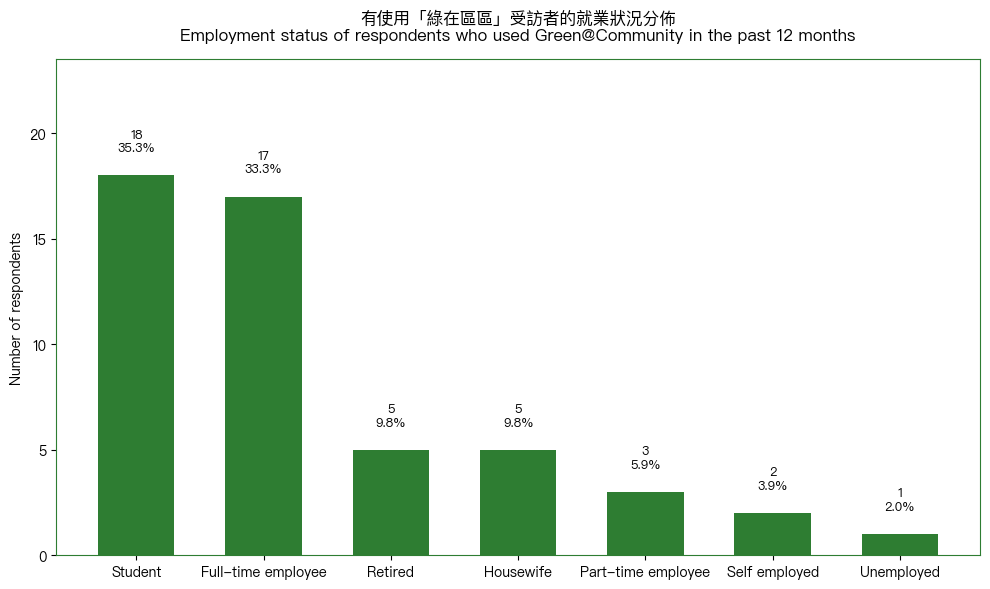

In [17]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from textwrap import wrap

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- helper to find columns by header pattern ----------
def find_col(columns, patterns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    return None

# column: 12-month use of G@C (Yes/No)
use_patterns = [
    r"in\s+the\s+past\s+12\s+months.*used\s+any\s+green@community\s+recycling\s+facility",
    r"在最近12個月.*有否使用過.*綠在區區.*回收設施",
]
use_col = find_col(df.columns, use_patterns)
if use_col is None:
    raise RuntimeError("Could not find the 'past 12 months use' Yes/No column.")

# column: Employment status
emp_patterns = [
    r"employment\s*status",
    r"就業狀況",
]
emp_col = find_col(df.columns, emp_patterns)
if emp_col is None:
    raise RuntimeError("Could not find the Employment status column.")

use_series = df[use_col].astype(str)
emp_series = df[emp_col].astype(str)

# ---------- map Yes/No usage ----------
def used_facility(text):
    s = str(text).strip().lower()
    if s in {"yes", "y", "是", "有"}:
        return True
    if s in {"no", "n", "否", "沒有", "未有", "無"}:
        return False
    return None

use_flags = use_series.map(used_facility)

# filter only respondents who answered "Yes"
mask_yes = (use_flags == True)
emp_yes = emp_series[mask_yes].dropna().str.strip()
emp_yes = emp_yes[emp_yes != ""]

# ---------- count employment groups & sort by value (DESC) ----------
counts_raw = emp_yes.value_counts().sort_values(ascending=False)

labels = list(counts_raw.index)
counts = [int(c) for c in counts_raw.values]
total = sum(counts)

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK",
                  "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# ---------- plot vertical bar chart (green, with space between bars) ----------
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.set_facecolor("white")

x = range(len(labels))
bar_color = "#2e7d32"  # green

# green border for axes
for spine in ax.spines.values():
    spine.set_color(bar_color)

# narrower width to create more gap between bars
bars = ax.bar(x, counts, color=bar_color, width=0.6)

# add count + percentage labels above bars
max_count = max(counts) if counts else 0
ax.set_ylim(0, max_count * 1.25 + 1)

for i, c in enumerate(counts):
    pct = (c / total * 100) if total > 0 else 0.0
    ax.text(
        i,
        c + max(1, max_count * 0.03),
        f"{c}\n{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9,
    )

ax.set_xticks(list(x))
# CENTER the category labels under each bar
ax.set_xticklabels(labels, rotation=0, ha="center")

ax.set_ylabel("Number of respondents")

title_cn = "有使用「綠在區區」受訪者的就業狀況分佈"
title_en = "Employment status of respondents who used Green@Community in the past 12 months"
ax.set_title(title_cn + "\n" + title_en, pad=14)

plt.tight_layout()
plt.show()


## Building type they live in

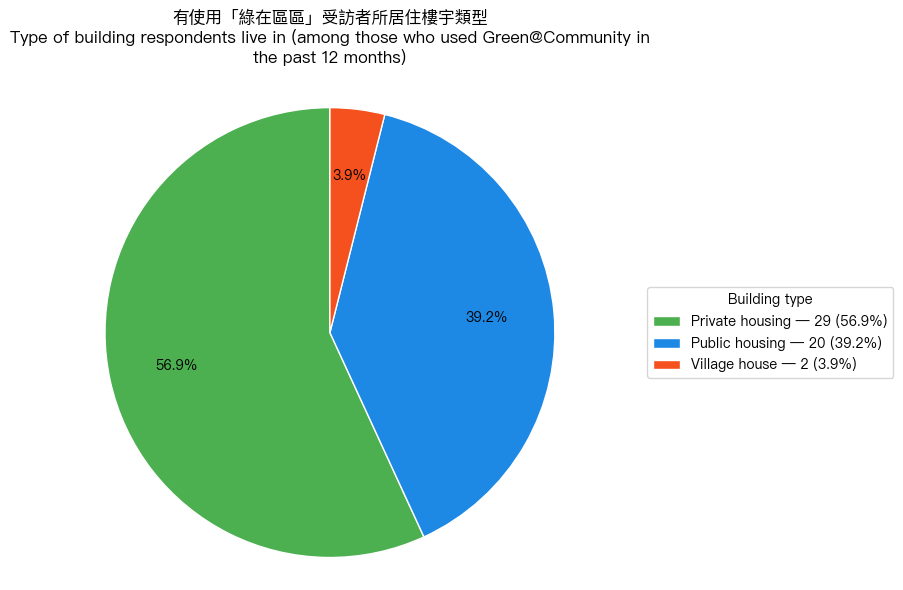

In [20]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path
from textwrap import wrap

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- helper to find columns by header pattern ----------
def find_col(columns, patterns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    return None

# column: 12-month use of G@C (Yes/No)
use_patterns = [
    r"in\s+the\s+past\s+12\s+months.*used\s+any\s+green@community\s+recycling\s+facility",
    r"在最近12個月.*有否使用過.*綠在區區.*回收設施",
]
use_col = find_col(df.columns, use_patterns)
if use_col is None:
    raise RuntimeError("Could not find the 'past 12 months use' Yes/No column.")

# column: Type of building you live in
bldg_patterns = [
    r"type\s+of\s+building\s+you\s+live\s+in",
    r"住宅樓宇類型",
]
bldg_col = find_col(df.columns, bldg_patterns)
if bldg_col is None:
    raise RuntimeError("Could not find the 'Type of building you live in' column.")

use_series = df[use_col].astype(str)
bldg_series = df[bldg_col].astype(str)

# ---------- map Yes/No usage ----------
def used_facility(text):
    s = str(text).strip().lower()
    if s in {"yes", "y", "是", "有"}:
        return True
    if s in {"no", "n", "否", "沒有", "未有", "無"}:
        return False
    return None

use_flags = use_series.map(used_facility)

# filter only respondents who answered "Yes"
mask_yes = (use_flags == True)
bldg_yes = bldg_series[mask_yes].dropna().str.strip()
bldg_yes = bldg_yes[bldg_yes != ""]

# ---------- count building types & sort by value (DESC) ----------
counts_raw = bldg_yes.value_counts().sort_values(ascending=False)

labels = list(counts_raw.index)
counts = [int(c) for c in counts_raw.values]
total = sum(counts)

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK",
                  "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# ---------- legend labels ----------
pct = [(c / total * 100) if total > 0 else 0.0 for c in counts]
legend_labels = [
    f"{labels[i]} — {counts[i]} ({pct[i]:.1f}%)"
    for i in range(len(labels))
]

# ---------- plot pie chart (multi-colour, legend on right) ----------
fig, ax = plt.subplots(figsize=(9, 6), facecolor="white")
ax.set_facecolor("white")

# Distinct colour palette (not all green)
base_colors = [
    "#4CAF50",  # green
    "#1E88E5",  # blue
    "#F4511E",  # orange-red
    "#8E24AA",  # purple
    "#FFB300",  # amber
    "#00897B",  # teal
    "#6D4C41",  # brown
    "#D81B60",  # magenta
]
colors = base_colors[:len(counts)]

wedges, text_labels, autotexts = ax.pie(
    counts,
    labels=None,  # use legend for labels
    colors=colors,
    startangle=90,
    autopct=(lambda p: f"{p:.1f}%") if total > 0 else None,
    pctdistance=0.7,
    wedgeprops=dict(edgecolor="white"),
)

ax.legend(
    wedges,
    legend_labels,
    title="Building type",
    loc="center left",
    bbox_to_anchor=(1.02, 0.5),
    borderaxespad=0.0,
)

title_cn = "有使用「綠在區區」受訪者所居住樓宇類型"
title_en = "Type of building respondents live in\n(among those who used Green@Community in the past 12 months)"
wrapped_en = "\n".join(wrap(title_en, 80))

ax.set_title(title_cn + "\n" + wrapped_en, pad=16)

ax.axis("equal")  # keep pie circular
plt.tight_layout()
plt.show()


## Education level

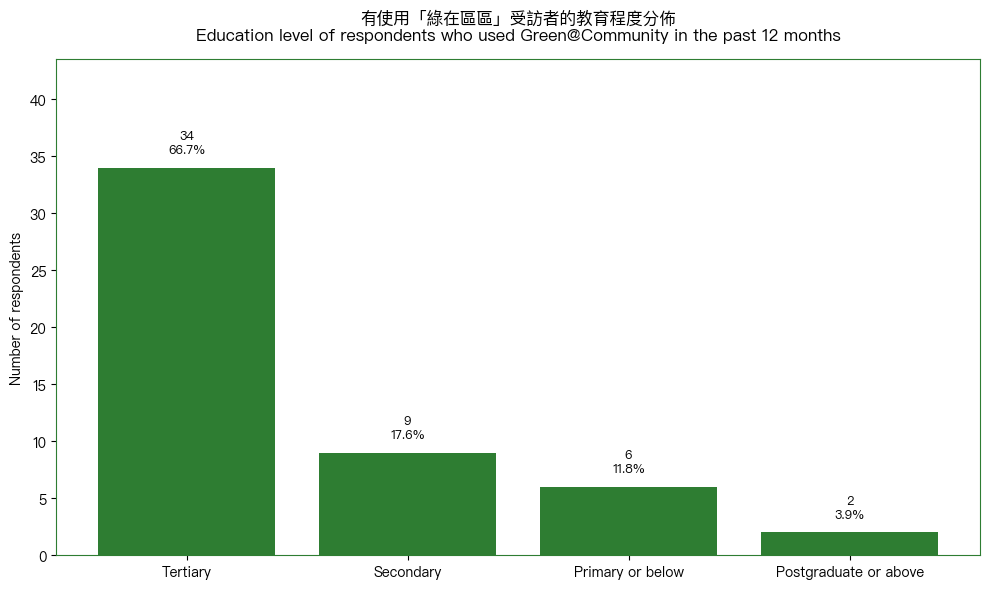

In [22]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from pathlib import Path

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- helper to find columns by header pattern ----------
def find_col(columns, patterns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    return None

# column: 12-month use of G@C (Yes/No)
use_patterns = [
    r"in\s+the\s+past\s+12\s+months.*used\s+any\s+green@community\s+recycling\s+facility",
    r"在最近12個月.*有否使用過.*綠在區區.*回收設施",
]
use_col = find_col(df.columns, use_patterns)
if use_col is None:
    raise RuntimeError("Could not find the 'past 12 months use' Yes/No column.")

# column: Education level
edu_patterns = [
    r"education\s*level",
    r"教育程度",
]
edu_col = find_col(df.columns, edu_patterns)
if edu_col is None:
    raise RuntimeError("Could not find the Education level column.")

use_series = df[use_col].astype(str)
edu_series = df[edu_col].astype(str)

# ---------- map Yes/No usage ----------
def used_facility(text):
    s = str(text).strip().lower()
    if s in {"yes", "y", "是", "有"}:
        return True
    if s in {"no", "n", "否", "沒有", "未有", "無"}:
        return False
    return None

use_flags = use_series.map(used_facility)

# filter only respondents who answered "Yes"
mask_yes = (use_flags == True)
edu_yes = edu_series[mask_yes].dropna().str.strip()
edu_yes = edu_yes[edu_yes != ""]

# ---------- count education groups & sort by value (DESC) ----------
counts_raw = edu_yes.value_counts().sort_values(ascending=False)

labels = list(counts_raw.index)
counts = [int(c) for c in counts_raw.values]
total = sum(counts)

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK",
                  "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        plt.rcParams["font.family"] = font_name
        break
plt.rcParams["axes.unicode_minus"] = False

# ---------- plot vertical bar chart (green) ----------
fig, ax = plt.subplots(figsize=(10, 6), facecolor="white")
ax.set_facecolor("white")

x = range(len(labels))
bar_color = "#2e7d32"  # green

# green border for axes
for spine in ax.spines.values():
    spine.set_color(bar_color)

bars = ax.bar(x, counts, color=bar_color)

# add count + percentage labels above bars
max_count = max(counts) if counts else 0
ax.set_ylim(0, max_count * 1.25 + 1)

for i, c in enumerate(counts):
    pct = (c / total * 100) if total > 0 else 0.0
    ax.text(
        i,
        c + max(1, max_count * 0.03),
        f"{c}\n{pct:.1f}%",
        ha="center",
        va="bottom",
        fontsize=9,
    )

ax.set_xticks(list(x))
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.set_ylabel("Number of respondents")

title_cn = "有使用「綠在區區」受訪者的教育程度分佈"
title_en = "Education level of respondents who used Green@Community in the past 12 months"
ax.set_title(title_cn + "\n" + title_en, pad=14)

plt.tight_layout()
plt.show()


## overview 2.5 試試用這個方式呈現

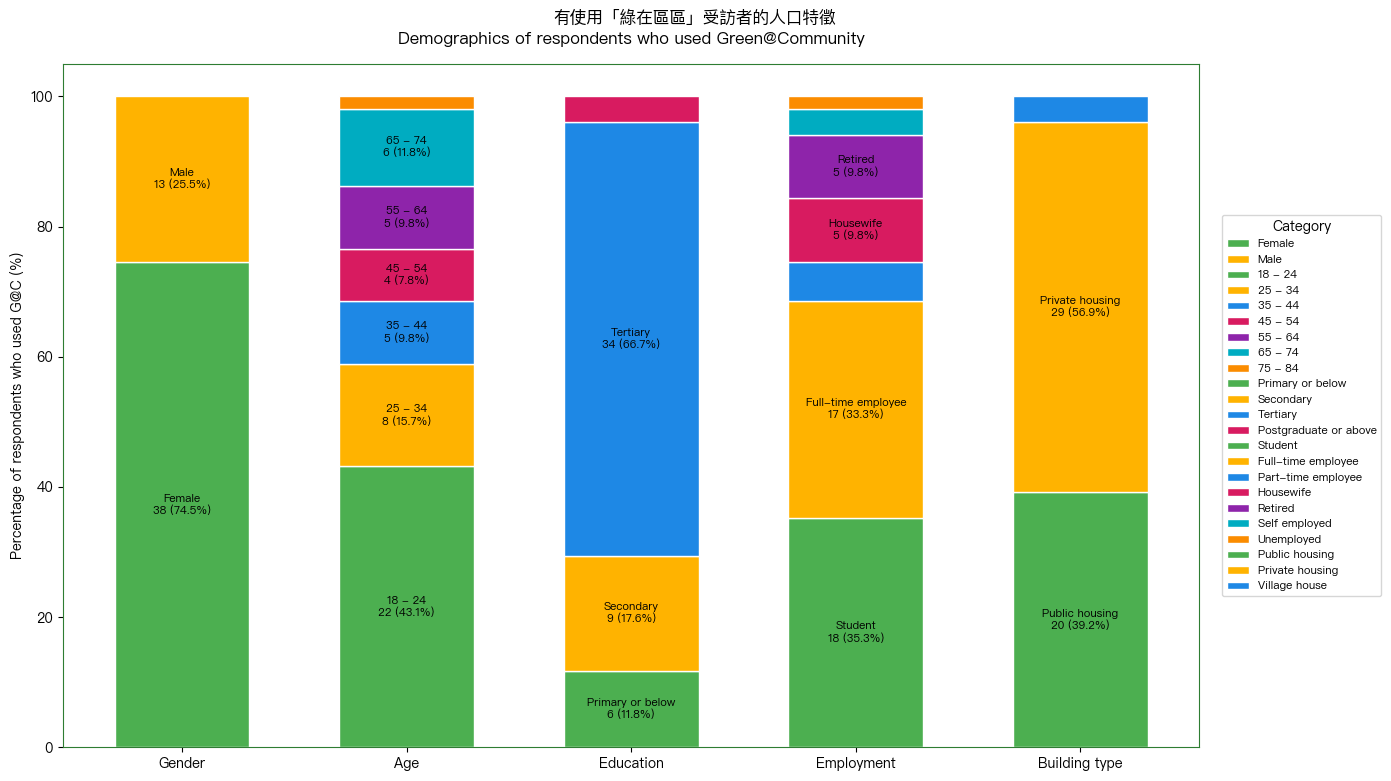

In [2]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- helper to find columns by header pattern ----------
def find_col(columns, patterns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    return None

# column: 12-month use of G@C (Yes/No)
use_patterns = [
    r"in\s+the\s+past\s+12\s+months.*used\s+any\s+green@community\s+recycling\s+facility",
    r"在最近12個月.*有否使用過.*綠在區區.*回收設施",
]
use_col = find_col(df.columns, use_patterns)
if use_col is None:
    raise RuntimeError("Could not find the 'past 12 months use' Yes/No column.")

# demographic columns
gender_col = find_col(df.columns, [r"\bgender\b", r"性別"])
age_col    = find_col(df.columns, [r"\bage\b", r"年齡"])
edu_col    = find_col(df.columns, [r"education\s*level", r"教育程度"])
emp_col    = find_col(df.columns, [r"employment\s*status", r"就業狀況"])
bldg_col   = find_col(df.columns, [r"type\s+of\s+building\s+you\s+live\s+in", r"住宅樓宇類型"])

for c, name in [
    (gender_col, "Gender"),
    (age_col, "Age"),
    (edu_col, "Education level"),
    (emp_col, "Employment status"),
    (bldg_col, "Type of building you live in"),
]:
    if c is None:
        raise RuntimeError(f"Could not find the '{name}' column.")

use_series    = df[use_col].astype(str)
gender_series = df[gender_col].astype(str)
age_series    = df[age_col].astype(str)
edu_series    = df[edu_col].astype(str)
emp_series    = df[emp_col].astype(str)
bldg_series   = df[bldg_col].astype(str)

# ---------- map Yes/No usage ----------
def used_facility(text: str):
    s = str(text).strip().lower()
    if s in {"yes", "y", "是", "有"}:
        return True
    if s in {"no", "n", "否", "沒有", "未有", "無"}:
        return False
    return None

use_flags = use_series.map(used_facility)
mask_yes = use_flags == True   # only participants who have used G@C in past 12 months

# ---------- helper to get ordered categories, counts, percentages ----------
def get_counts(series, order_pref=None):
    s = series[mask_yes].dropna().astype(str).str.strip()
    s = s[s != ""]
    counts_raw = s.value_counts()

    if order_pref is None:
        labels = list(counts_raw.index)
    else:
        labels = [c for c in order_pref if c in counts_raw.index] + \
                 [c for c in counts_raw.index if c not in (order_pref or [])]

    counts = [int(counts_raw.get(c, 0)) for c in labels]
    total = sum(counts)
    pct = [c / total * 100 if total > 0 else 0.0 for c in counts]
    return labels, counts, pct

age_order = [
    "17 or below",
    "18 - 24",
    "25 - 34",
    "35 - 44",
    "45 - 54",
    "55 - 64",
    "65 - 74",
    "75 - 84",
    "85 or above",
]
edu_order = [
    "Primary or below",
    "Secondary",
    "Tertiary",
    "Postgraduate or above",
]
emp_order = [
    "Student",
    "Full-time employee",
    "Part-time employee",
    "Housewife",
    "Retired",
    "Self employed",
    "Unemployed",
]
bldg_order = [
    "Public housing",
    "Private housing",
    "Village house",
]

gender_labels, gender_counts, gender_pct = get_counts(
    gender_series, ["Female", "Male", "Other"]
)
age_labels, age_counts, age_pct       = get_counts(age_series, age_order)
edu_labels, edu_counts, edu_pct       = get_counts(edu_series, edu_order)
emp_labels, emp_counts, emp_pct       = get_counts(emp_series, emp_order)
bldg_labels, bldg_counts, bldg_pct    = get_counts(bldg_series, bldg_order)

variables = [
    ("Gender",      gender_labels, gender_counts, gender_pct),
    ("Age",         age_labels,    age_counts,    age_pct),
    ("Education",   edu_labels,    edu_counts,    edu_pct),
    ("Employment",  emp_labels,    emp_counts,    emp_pct),
    ("Building type", bldg_labels, bldg_counts,   bldg_pct),
]

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK",
                  "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        matplotlib.rcParams["font.family"] = font_name
        break
matplotlib.rcParams["axes.unicode_minus"] = False

# ---------- stacked bar chart ----------
fig, ax = plt.subplots(figsize=(14, 8), facecolor="white")  # bigger figure
ax.set_facecolor("white")

palette = [
    "#4CAF50",
    "#FFB300",
    "#1E88E5",
    "#D81B60",
    "#8E24AA",
    "#00ACC1",
    "#FB8C00",
    "#6D4C41",
    "#9CCC65",
    "#5E35B1",
]

x_pos = range(len(variables))
bar_width = 0.6
label_threshold = 6.0  # only show text for segments >= 6% to reduce overlap

legend_handles = []
legend_labels_all = []

for i, (_var_name, labels, counts, pct) in enumerate(variables):
    bottom = 0.0
    for j, (lab, c, p) in enumerate(zip(labels, counts, pct)):
        if c == 0:
            continue
        color = palette[j % len(palette)]
        bar = ax.bar(i, p, width=bar_width, bottom=bottom,
                     color=color, edgecolor="white")

        # collect for legend (one handle per category name)
        if lab not in legend_labels_all:
            legend_handles.append(bar[0])
            legend_labels_all.append(lab)

        if p >= label_threshold:
            ax.text(
                i,
                bottom + p / 2,
                f"{lab}\n{c} ({p:.1f}%)",
                ha="center",
                va="center",
                fontsize=8,
            )
        bottom += p

ax.set_xticks(list(x_pos))
ax.set_xticklabels([v[0] for v in variables], rotation=0, ha="center")

ax.set_ylabel("Percentage of respondents who used G@C (%)")
ax.set_ylim(0, 105)
ax.set_yticks(range(0, 101, 20))

border_color = "#2e7d32"
for spine in ax.spines.values():
    spine.set_color(border_color)

# legend on the right listing all categories
ax.legend(
    legend_handles,
    legend_labels_all,
    title="Category",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    borderaxespad=0.0,
    fontsize=8,
)

title_cn = "有使用「綠在區區」受訪者的人口特徵"
title_en = "Demographics of respondents who used Green@Community"
fig.suptitle(title_cn, y=0.97)
ax.set_title(title_en, pad=14)

plt.tight_layout()
plt.show()


## overview 2.5 試試用這個方式呈現 2

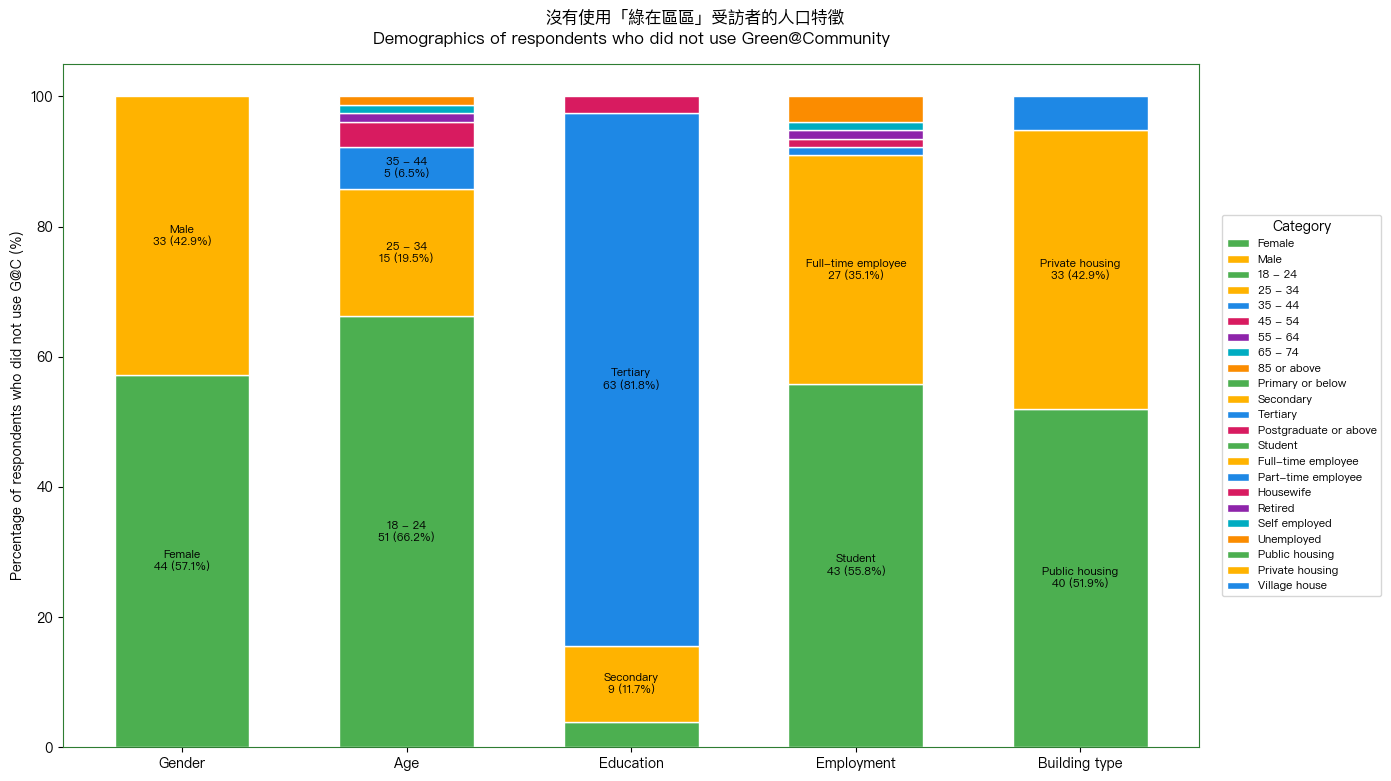

In [3]:
# ---------- install deps if missing ----------
import importlib, subprocess, sys
def _ensure(pkg, mod=None):
    try:
        importlib.import_module(mod or pkg)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", pkg])

_ensure("pandas")
_ensure("openpyxl")
_ensure("matplotlib")

# ---------- imports ----------
import re
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# ---------- load data ----------
data_path = Path("../GCAP3226 G@C Survey Responses_cleaned data.xlsx")
df = pd.read_excel(data_path, engine="openpyxl")

# ---------- helper to find columns by header pattern ----------
def find_col(columns, patterns):
    cols = [(c, re.sub(r"\s+", " ", str(c)).strip()) for c in columns]
    for c, norm in cols:
        if any(re.search(p, norm, flags=re.IGNORECASE) for p in patterns):
            return c
    return None

# column: 12-month use of G@C (Yes/No)
use_patterns = [
    r"in\s+the\s+past\s+12\s+months.*used\s+any\s+green@community\s+recycling\s+facility",
    r"在最近12個月.*有否使用過.*綠在區區.*回收設施",
]
use_col = find_col(df.columns, use_patterns)
if use_col is None:
    raise RuntimeError("Could not find the 'past 12 months use' Yes/No column.")

# demographic columns
gender_col = find_col(df.columns, [r"\bgender\b", r"性別"])
age_col    = find_col(df.columns, [r"\bage\b", r"年齡"])
edu_col    = find_col(df.columns, [r"education\s*level", r"教育程度"])
emp_col    = find_col(df.columns, [r"employment\s*status", r"就業狀況"])
bldg_col   = find_col(df.columns, [r"type\s+of\s+building\s+you\s+live\s+in", r"住宅樓宇類型"])

for c, name in [
    (gender_col, "Gender"),
    (age_col, "Age"),
    (edu_col, "Education level"),
    (emp_col, "Employment status"),
    (bldg_col, "Type of building you live in"),
]:
    if c is None:
        raise RuntimeError(f"Could not find the '{name}' column.")

use_series    = df[use_col].astype(str)
gender_series = df[gender_col].astype(str)
age_series    = df[age_col].astype(str)
edu_series    = df[edu_col].astype(str)
emp_series    = df[emp_col].astype(str)
bldg_series   = df[bldg_col].astype(str)

# ---------- map Yes/No usage ----------
def used_facility(text: str):
    s = str(text).strip().lower()
    if s in {"yes", "y", "是", "有"}:
        return True
    if s in {"no", "n", "否", "沒有", "未有", "無"}:
        return False
    return None

use_flags = use_series.map(used_facility)

# only participants who have NOT used G@C in past 12 months
mask_no = use_flags == False

# ---------- helper to get ordered categories, counts, percentages ----------
def get_counts(series, order_pref=None):
    s = series[mask_no].dropna().astype(str).str.strip()
    s = s[s != ""]
    counts_raw = s.value_counts()

    if order_pref is None:
        labels = list(counts_raw.index)
    else:
        labels = [c for c in order_pref if c in counts_raw.index] + \
                 [c for c in counts_raw.index if c not in (order_pref or [])]

    counts = [int(counts_raw.get(c, 0)) for c in labels]
    total = sum(counts)
    pct = [c / total * 100 if total > 0 else 0.0 for c in counts]
    return labels, counts, pct

age_order = [
    "17 or below",
    "18 - 24",
    "25 - 34",
    "35 - 44",
    "45 - 54",
    "55 - 64",
    "65 - 74",
    "75 - 84",
    "85 or above",
]
edu_order = [
    "Primary or below",
    "Secondary",
    "Tertiary",
    "Postgraduate or above",
]
emp_order = [
    "Student",
    "Full-time employee",
    "Part-time employee",
    "Housewife",
    "Retired",
    "Self employed",
    "Unemployed",
]
bldg_order = [
    "Public housing",
    "Private housing",
    "Village house",
]

gender_labels, gender_counts, gender_pct = get_counts(
    gender_series, ["Female", "Male", "Other"]
)
age_labels, age_counts, age_pct       = get_counts(age_series, age_order)
edu_labels, edu_counts, edu_pct       = get_counts(edu_series, edu_order)
emp_labels, emp_counts, emp_pct       = get_counts(emp_series, emp_order)
bldg_labels, bldg_counts, bldg_pct    = get_counts(bldg_series, bldg_order)

variables = [
    ("Gender",        gender_labels, gender_counts, gender_pct),
    ("Age",           age_labels,    age_counts,    age_pct),
    ("Education",     edu_labels,    edu_counts,    edu_pct),
    ("Employment",    emp_labels,    emp_counts,    emp_pct),
    ("Building type", bldg_labels,   bldg_counts,   bldg_pct),
]

# ---------- fonts (Chinese-capable if available) ----------
for font_name in ["Noto Sans CJK TC", "PingFang TC", "PingFang HK",
                  "Microsoft JhengHei", "SimHei"]:
    if any(font_name in f.name for f in matplotlib.font_manager.fontManager.ttflist):
        matplotlib.rcParams["font.family"] = font_name
        break
matplotlib.rcParams["axes.unicode_minus"] = False

# ---------- stacked bar chart ----------
fig, ax = plt.subplots(figsize=(14, 8), facecolor="white")
ax.set_facecolor("white")

palette = [
    "#4CAF50",
    "#FFB300",
    "#1E88E5",
    "#D81B60",
    "#8E24AA",
    "#00ACC1",
    "#FB8C00",
    "#6D4C41",
    "#9CCC65",
    "#5E35B1",
]

x_pos = range(len(variables))
bar_width = 0.6
label_threshold = 6.0  # only show text for segments >= 6% to reduce overlap

legend_handles = []
legend_labels_all = []

for i, (_var_name, labels, counts, pct) in enumerate(variables):
    bottom = 0.0
    for j, (lab, c, p) in enumerate(zip(labels, counts, pct)):
        if c == 0:
            continue
        color = palette[j % len(palette)]
        bar = ax.bar(i, p, width=bar_width, bottom=bottom,
                     color=color, edgecolor="white")

        # collect for legend (one handle per category name)
        if lab not in legend_labels_all:
            legend_handles.append(bar[0])
            legend_labels_all.append(lab)

        if p >= label_threshold:
            ax.text(
                i,
                bottom + p / 2,
                f"{lab}\n{c} ({p:.1f}%)",
                ha="center",
                va="center",
                fontsize=8,
            )
        bottom += p

ax.set_xticks(list(x_pos))
ax.set_xticklabels([v[0] for v in variables], rotation=0, ha="center")

ax.set_ylabel("Percentage of respondents who did not use G@C (%)")
ax.set_ylim(0, 105)
ax.set_yticks(range(0, 101, 20))

border_color = "#2e7d32"
for spine in ax.spines.values():
    spine.set_color(border_color)

# legend on the right listing all categories
ax.legend(
    legend_handles,
    legend_labels_all,
    title="Category",
    bbox_to_anchor=(1.02, 0.5),
    loc="center left",
    borderaxespad=0.0,
    fontsize=8,
)

title_cn = "沒有使用「綠在區區」受訪者的人口特徵"
title_en = "Demographics of respondents who did not use Green@Community"
fig.suptitle(title_cn, y=0.97)
ax.set_title(title_en, pad=14)

plt.tight_layout()
plt.show()
